## Task - 1
### Movie set

In [ ]:
import pandas as pd
import ast

In [167]:
movies = pd.read_csv("movies.csv")
credits= pd.read_csv("credits.csv")

In [168]:
df=pd.merge(movies ,credits,right_on='movie_id', left_on='id')

##### Cleaning Production companies column

In [169]:
df.production_companies = df.production_companies.str.split(":",n=1,expand=True)[1]
df.production_companies = df.production_companies.str.split(",",n=0,expand=True)[0]


In [170]:
df.production_companies =  df['production_companies'].str.replace('"', '')

df['production_companies'] = df['production_companies'].str.strip()

##### Cleaning genres column

In [171]:
df.genres = df.genres.str.split(",",n=2,expand=True)[1]
df.genres

0              "name": "Action"}
1           "name": "Adventure"}
2              "name": "Action"}
3              "name": "Action"}
4              "name": "Action"}
                  ...           
4798           "name": "Action"}
4799           "name": "Comedy"}
4800           "name": "Comedy"}
4801                        None
4802     "name": "Documentary"}]
Name: genres, Length: 4803, dtype: object

In [172]:
df.genres.dropna(inplace=True)

In [173]:
df['genres'] = df['genres'].apply(lambda x: x.split('"name"')[1])

In [174]:
df['genres'] =  df['genres'].str.replace('"', '')
df['genres'] =  df['genres'].str.replace('"', '')
df['genres'] =  df['genres'].str.replace(':', '')
df['genres'] =  df['genres'].str.replace(']', '')
df['genres'] =  df['genres'].str.replace('}', '')


In [175]:
df['genres'] = df['genres'].str.strip()

##### Converting the dtype to Datetime and getting the year  columns

In [176]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year
df.year = df.year.fillna(0).astype(int)


###### Cleaning the cast column

In [177]:
df['cast'] = df['cast'].str.split(":",n=6,expand=True)[6]
df['cast'] = df['cast'].str.split(",",n=0,expand=True)[0]

In [178]:
df['cast'] =  df['cast'].str.replace('"', '')
df['cast'] = df['cast'].str.strip()

#### 1. Which actor/actress has done the most number of Action movies

In [180]:
action_hero = df[df.genres =='Action']

In [211]:
Powerful_hero = action_hero.cast.value_counts()[:3]
Powerful_hero.reset_index()


,index,cast
0,Bruce Willis,16
1,Sylvester Stallone,16
2,Arnold Schwarzenegger,12


In [213]:
print("The hero with more action movies is", Powerful_hero.index[:1].values)

The hero with more action movies is ['Bruce Willis']


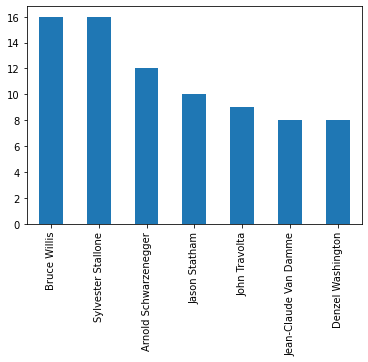

In [208]:
action_hero.cast.value_counts()[:7].plot(kind = 'bar')

####  2. What is the total revenue of movies produced by "Twentieth Century Fox Film Corporation" that were released after the year 2000 and had the actor Will Smith in it?m`

In [216]:
new_data = df[(df.production_companies == 'Twentieth Century Fox Film Corporation')& (df.year > 2000) & (df.cast == 'Will Smith')]

In [219]:
print("The total amount of revenue is RS",new_data.revenue.sum())

The total amount of revenue is RS 347234916


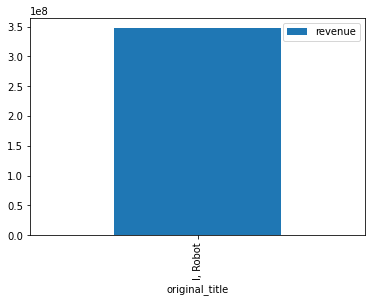

In [225]:
new_data.plot(x = 'original_title', y = "revenue", kind = 'bar')

#### 3. Create a summary dataset listing different movie genre and the production company making most movies in the particular genre.`m

In [229]:
df.groupby('genres').production_companies.value_counts()

genres   production_companies                  
Action   Paramount Pictures                        55
         Columbia Pictures                         48
         Universal Pictures                        48
         Twentieth Century Fox Film Corporation    44
         New Line Cinema                           26
                                                   ..
Western  The Javelina Film Company                  1
         The Selznik Studio                         1
         Tig Productions                            1
         Tree Line Films                            1
         Universal Pictures                         1
Name: production_companies, Length: 2127, dtype: int64

#### Conclusion: From the above table We  can say that "Paramount_companies" has produced more films in "Action" Genre

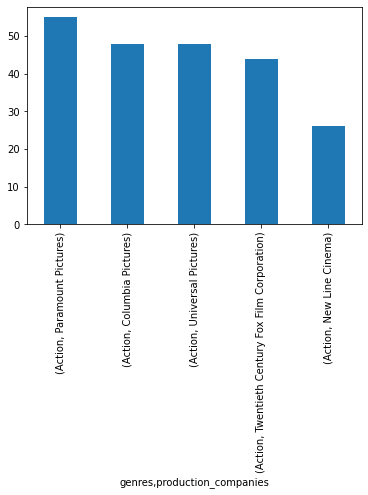

In [231]:
df.groupby('genres').production_companies.value_counts()[:5].plot(kind = 'bar')

#### 4. Rank the production company based on the mean popularity of the produced movies.

In [232]:
rank_data = pd.DataFrame(df.groupby('production_companies').popularity.mean())
rank_data.reset_index(inplace = True)

print("The Top Five Production comapnies with their mean is as follows :")
print(rank_data.sort_values(by= 'popularity', ascending = False).set_index("production_companies")[:5])

The Top Five Production comapnies with their mean is as follows :
                                popularity
production_companies                      
Black Bear Pictures             145.364591
Marvel Studios                  134.390332
Gotham Group                    113.161483
Lightstorm Entertainment        101.741550
Patalex IV Productions Limited  101.250416


In [234]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'mean popularity value')

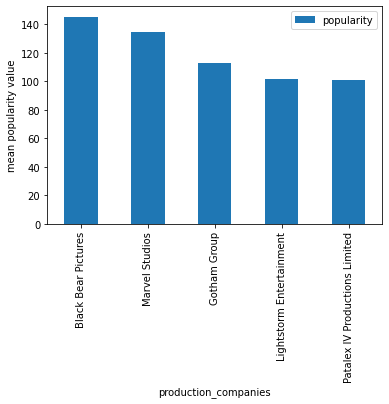

In [235]:
rank_data.sort_values(by= 'popularity', ascending = False).set_index("production_companies")[:5].plot(kind = 'bar')
plt.ylabel("mean popularity value")